   # **Exploratory data analysis with python: e-commerce project**


> # **INTRODUCTION**


This is a project developed with a dataset created by *[ANAND SINGH](https://www.kaggle.com/datasets/anandku79/globalmarket)* using python libraries for data science like numpy, pandas, and matplotlib and seaborn for visualizations.

With this development we are able to get valuable insights and identify shopping trends of the custommers of this company and help guide the company's marketing strategy.

> # **TABLE OF CONTENTS**


[1.	PREPARATION](#1)

[2.	PROCESSING](#2)

[3.	ANALYSIS](#3)


<a id="1"></a> <br>
> # **1. PREPARATION**

**1.1. Data source**

For this study, I used a dataset created by *[ANAND SINGH](https://www.kaggle.com/datasets/anandku79/globalmarket)* that tracks the operation of a international e-comerce business. It contains data from 4 years of operation from 2012 to 2015 classified by product categoty, market and geographical location.

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (5,5)
plt.style.use('ggplot')

In [2]:
# Import dataset - Read csv

df = pd.read_csv("/kaggle/input/global-superstore-2016csv/global_superstore_2016.csv",
                 sep=',', header=0, encoding=('latin-1'))

**1.2. Dataset preview**

After previewing the dataset, we can see it contains a dataframe with 51290 rows and 24 columns, which I will not use all. There are some columns that need improvement in it formatting, such as Order Date column as object, it has to be formatted as datetime, and some others numeric columnsm like Sales.

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,11/11/2014,13-11-2014,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,5/2/2014,7/2/2014,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,($288.77),923.63,Critical
2,25330,IN-2014-CR127307-41929,17-10-2014,18-10-2014,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,28-01-2014,30-01-2014,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,Germany,Western Europe,Europe,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,($96.54),910.16,Medium
4,47221,SG-2014-RH9495111-41948,5/11/2014,6/11/2014,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,Senegal,Western Africa,Africa,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [4]:
df.info

<bound method DataFrame.info of        Row ID                  Order ID  Order Date   Ship Date  \
0       40098  CA-2014-AB10015140-41954  11/11/2014  13-11-2014   
1       26341    IN-2014-JR162107-41675    5/2/2014    7/2/2014   
2       25330    IN-2014-CR127307-41929  17-10-2014  18-10-2014   
3       13524   ES-2014-KM1637548-41667  28-01-2014  30-01-2014   
4       47221   SG-2014-RH9495111-41948   5/11/2014   6/11/2014   
...       ...                       ...         ...         ...   
51285   29002   IN-2015-KE1642066-42174  19-06-2015  19-06-2015   
51286   34337  US-2014-ZD21925140-41765    6/5/2014   10/5/2014   
51287   31315  CA-2012-ZD21925140-41147  26-08-2012  31-08-2012   
51288    9596   MX-2013-RB1979518-41322  17-02-2013  21-02-2013   
51289    6147   MX-2013-MC1810093-41416  22-05-2013  26-05-2013   

            Ship Mode   Customer ID       Customer Name      Segment  \
0         First Class  AB-100151402       Aaron Bergman     Consumer   
1        Second Cla

In [5]:
df.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
Postal Code       float64
City               object
State              object
Country            object
Region             object
Market             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales              object
Quantity            int64
Discount          float64
Profit             object
Shipping Cost     float64
Order Priority     object
dtype: object

**1.3. Limitations**

There are some limitations I found in the dataset.

* It is out of date (Period between 2012 and May 2015).
* Lack of context, specifically in the Profit column, I can see some negative values that we need more contet to analyze these values.

Acknowledging these limitations, I decided to continue with the analysis and get some insight on the general market trends for this e-commerce.

<a id="2"></a> <br>
> # **2. PROCESSING**

Start processing the data, performing some cleaning, checking for missing data and duplicates values. Having the dataframe ready, start creating new columns and summarizing information for further analysis.


**2.1. Data cleaning**

In [6]:
# Delete unnecesary columns RowID and Postal Code

df.drop(['Row ID', 'Postal Code', 'Profit'],
         axis=1, inplace=True)

In [7]:
print(df.columns)

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Country', 'Region',
       'Market', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Shipping Cost', 'Order Priority'],
      dtype='object')


In [8]:
# Re-name columns to a standard typing and making more sense

df = df.rename(columns={'Ship Date': 'shipping_date', 'Ship Mode': 'shipping_mode', 'Sales': 'total_sale'})
df.columns = map(str.lower, df.columns)
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('-', '_')

In [9]:
# Format currency columns (object) into decimal (float)

df['total_sale'] = df['total_sale'].str.replace('$', '').str.replace(',', '').astype(float)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
# Standarize decimal (float) columns to 2 decimal places

df['shipping_cost'] = df['shipping_cost'].round(2)
df['total_sale'] = df['total_sale'].round(2)
df['discount'] = df['discount'].round(2)

In [11]:
# Format date columns (object) into datetime

df['order_date'] = df['order_date'].str.replace('-', '/').astype(str)
df['shipping_date'] = df['shipping_date'].str.replace('-', '/').astype(str)

In [12]:
df['order_date'] = pd.to_datetime(df['order_date'], format='%d/%m/%Y')
df['shipping_date'] = pd.to_datetime(df['shipping_date'], format='%d/%m/%Y')

In [13]:
df.head(2)

,order_id,order_date,shipping_date,shipping_mode,customer_id,customer_name,segment,city,state,country,region,market,product_id,category,sub_category,product_name,total_sale,quantity,discount,shipping_cost,order_priority
0,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,40.77,High
1,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,923.63,Critical


In [14]:
df.dtypes

order_id                  object
order_date        datetime64[ns]
shipping_date     datetime64[ns]
shipping_mode             object
customer_id               object
customer_name             object
segment                   object
city                      object
state                     object
country                   object
region                    object
market                    object
product_id                object
category                  object
sub_category              object
product_name              object
total_sale               float64
quantity                   int64
discount                 float64
shipping_cost            float64
order_priority            object
dtype: object

In [15]:
print(df.columns)

Index(['order_id', 'order_date', 'shipping_date', 'shipping_mode',
       'customer_id', 'customer_name', 'segment', 'city', 'state', 'country',
       'region', 'market', 'product_id', 'category', 'sub_category',
       'product_name', 'total_sale', 'quantity', 'discount', 'shipping_cost',
       'order_priority'],
      dtype='object')


In [16]:
# Re-order columns making more sense

df = df.reindex(columns=['order_date', 'order_id', 'order_priority', 'shipping_date', 'shipping_mode', 'shipping_cost',
                         'product_id', 'product_name', 'category', 'sub_category', 'quantity', 'total_sale', 'discount',
                         'customer_id', 'customer_name', 'segment', 'city', 'state', 'country', 'region', 'market'])

pd.set_option('display.max_columns', None)
df.head(2)

,order_date,order_id,order_priority,shipping_date,shipping_mode,shipping_cost,product_id,product_name,category,sub_category,quantity,total_sale,discount,customer_id,customer_name,segment,city,state,country,region,market
0,2014-11-11,CA-2014-AB10015140-41954,High,2014-11-13,First Class,40.77,TEC-PH-5816,Samsung Convoy 3,Technology,Phones,2,221.98,0.0,AB-100151402,Aaron Bergman,Consumer,Oklahoma City,Oklahoma,United States,Central US,USCA
1,2014-02-05,IN-2014-JR162107-41675,Critical,2014-02-07,Second Class,923.63,FUR-CH-5379,"Novimex Executive Leather Armchair, Black",Furniture,Chairs,9,3709.40,0.1,JR-162107,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,Oceania,Asia Pacific


In [17]:
# Missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

order_date - 0.0%
order_id - 0.0%
order_priority - 0.0%
shipping_date - 0.0%
shipping_mode - 0.0%
shipping_cost - 0.0%
product_id - 0.0%
product_name - 0.0%
category - 0.0%
sub_category - 0.0%
quantity - 0.0%
total_sale - 0.0%
discount - 0.0%
customer_id - 0.0%
customer_name - 0.0%
segment - 0.0%
city - 0.0%
state - 0.0%
country - 0.0%
region - 0.0%
market - 0.0%


In [18]:
# Checking for duplicates

df.loc[df.duplicated()]

,order_date,order_id,order_priority,shipping_date,shipping_mode,shipping_cost,product_id,product_name,category,sub_category,quantity,total_sale,discount,customer_id,customer_name,segment,city,state,country,region,market


In [19]:
df.loc[df.duplicated(subset=['order_id'])].head()

    # Checking column order_id duplicates are due probably for adjustments or changes to the original order
    # as it seems to be in order CA-2012-AB10015140-40974, where there are both related to different products

,order_date,order_id,order_priority,shipping_date,shipping_mode,shipping_cost,product_id,product_name,category,sub_category,quantity,total_sale,discount,customer_id,customer_name,segment,city,state,country,region,market
8,2014-11-11,CA-2014-AB10015140-41954,High,2014-11-13,First Class,25.27,FUR-BO-5957,"Sauder Facets Collection Library, Sky Alder Fi...",Furniture,Bookcases,2,341.96,0.0,AB-100151402,Aaron Bergman,Consumer,Oklahoma City,Oklahoma,United States,Central US,USCA
10,2012-03-06,CA-2012-AB10015140-40974,High,2012-03-07,First Class,4.29,OFF-AR-5309,Newell 330,Office Supplies,Art,3,17.94,0.0,AB-100151404,Aaron Bergman,Consumer,Seattle,Washington,United States,Western US,USCA
21,2012-03-06,CA-2012-AB10015140-40974,High,2012-03-07,First Class,1.28,OFF-ST-3744,"Carina 42""Hx23 3/4""W Media Storage Unit",Office Supplies,Storage,3,242.94,0.0,AB-100151404,Aaron Bergman,Consumer,Seattle,Washington,United States,Western US,USCA
34,2013-12-27,CA-2013-AH10030140-41635,Medium,2013-12-31,Standard Class,26.70,OFF-ST-4291,Fellowes Super Stor/Drawer Files,Office Supplies,Storage,2,323.10,0.0,AH-100301404,Aaron Hawkins,Corporate,San Francisco,California,United States,Western US,USCA
52,2012-12-30,CA-2012-AH10030140-41273,High,2012-12-31,First Class,1.30,OFF-LA-3231,Avery 51,Office Supplies,Labels,3,18.90,0.0,AH-100301406,Aaron Hawkins,Corporate,New York City,New York,United States,Eastern US,USCA


In [20]:
df['order_id'].drop_duplicates().sort_values(ascending=False)

6952     ZA-2015-TS11205146-42062
11016    ZA-2015-SW10350146-42061
34237    ZA-2015-SM10005146-42241
22287     ZA-2015-RP9390146-42099
42720     ZA-2015-RC9960146-42257
                   ...           
46948     AE-2015-JD5790138-42070
27486     AE-2015-GH4665138-42351
44217     AE-2014-MY7380138-42004
5597      AE-2014-EB4110138-41926
29575     AE-2012-PO8865138-41184
Name: order_id, Length: 25728, dtype: object

**2.2. Data processing**

In [21]:
# Insert order processing time column

df.insert(loc=4, column='order_processing_time', value=(df['shipping_date'] - df['order_date']).dt.days)
df.head(2)

,order_date,order_id,order_priority,shipping_date,order_processing_time,shipping_mode,shipping_cost,product_id,product_name,category,sub_category,quantity,total_sale,discount,customer_id,customer_name,segment,city,state,country,region,market
0,2014-11-11,CA-2014-AB10015140-41954,High,2014-11-13,2,First Class,40.77,TEC-PH-5816,Samsung Convoy 3,Technology,Phones,2,221.98,0.0,AB-100151402,Aaron Bergman,Consumer,Oklahoma City,Oklahoma,United States,Central US,USCA
1,2014-02-05,IN-2014-JR162107-41675,Critical,2014-02-07,2,Second Class,923.63,FUR-CH-5379,"Novimex Executive Leather Armchair, Black",Furniture,Chairs,9,3709.40,0.1,JR-162107,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,Oceania,Asia Pacific


In [22]:
# Add price_per unit column:

    # Start by creating the column calculating the price per unit value

df['price_unit'] = df['total_sale'] / df['quantity']
df['price_unit'] = df['price_unit'].round(2)

    # Now remove the column, and then inserting in a better position

price_unit = df.pop('price_unit')
df.insert(loc=11, column='price_unit', value=price_unit)

df.head(2)

,order_date,order_id,order_priority,shipping_date,order_processing_time,shipping_mode,shipping_cost,product_id,product_name,category,sub_category,price_unit,quantity,total_sale,discount,customer_id,customer_name,segment,city,state,country,region,market
0,2014-11-11,CA-2014-AB10015140-41954,High,2014-11-13,2,First Class,40.77,TEC-PH-5816,Samsung Convoy 3,Technology,Phones,110.99,2,221.98,0.0,AB-100151402,Aaron Bergman,Consumer,Oklahoma City,Oklahoma,United States,Central US,USCA
1,2014-02-05,IN-2014-JR162107-41675,Critical,2014-02-07,2,Second Class,923.63,FUR-CH-5379,"Novimex Executive Leather Armchair, Black",Furniture,Chairs,412.16,9,3709.40,0.1,JR-162107,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,Oceania,Asia Pacific


<a id="5"></a> <br>
> # **5. ANALYSIS**
 


In [23]:
# Summarizing data:

    # By year

df.insert(loc=2, column='year', value=(df['order_date'].dt.year))

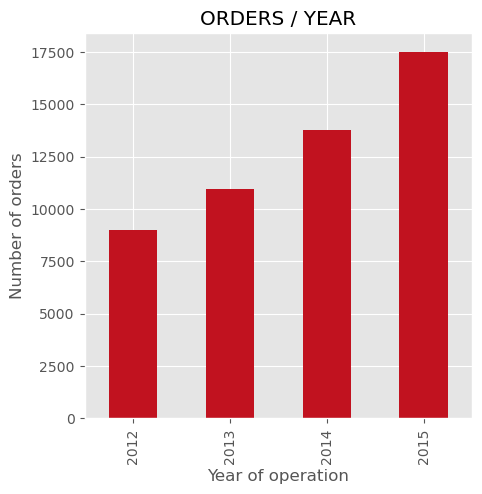

In [24]:
    # Number of orders by year

ax = df['year'].value_counts(ascending=True) \
    .plot(kind='bar', color='#c1121f', title='ORDERS / YEAR')
ax.set_xlabel('Year of operation')
ax.set_ylabel('Number of orders')
plt.show()

In [25]:
year = df.groupby('year').agg({'total_sale':'sum', 'order_id':'count'})
year.head()

,total_sale,order_id
year,,
2012,2259451.64,8998
2013,2677439.91,10962
2014,3405748.03,13799
2015,4299867.67,17531


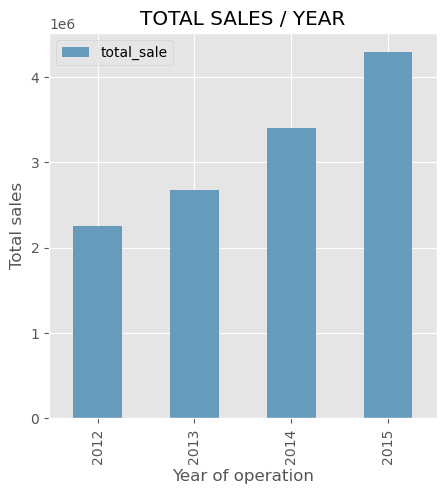

In [26]:
    # Yearly sales

ax = df.groupby('year').agg({'total_sale':'sum'})\
    .plot(kind='bar', color='#669bbc', title='TOTAL SALES / YEAR')
ax.set_xlabel('Year of operation')
ax.set_ylabel('Total sales')
plt.show()

Analizing this information, we can see the growth in sales from 2012 to 2015 having almost twice the ammount of orders in 2015 (17,531 orders) comparing with the starting ammount in 2012 (8,998 orders)

In [27]:
# Top 10 most sold products

products = df.groupby('product_name').agg({'total_sale':'sum'}).sort_values(by='total_sale', ascending=False).reset_index()
products['sales%'] = (products['total_sale'] / products['total_sale'].sum() * 100).round(2)
products.head(10)

,product_name,total_sale,sales%
0,"Apple Smart Phone, Full Size",86935.79,0.69
1,"Cisco Smart Phone, Full Size",76441.53,0.60
2,"Motorola Smart Phone, Full Size",73156.33,0.58
3,"Nokia Smart Phone, Full Size",71904.56,0.57
4,Canon imageCLASS 2200 Advanced Copier,61599.83,0.49
5,"Hon Executive Leather Armchair, Adjustable",58193.52,0.46
6,"Office Star Executive Leather Armchair, Adjust...",50661.68,0.40
7,"Harbour Creations Executive Leather Armchair, ...",50121.52,0.40
8,"Samsung Smart Phone, Cordless",48653.46,0.38
9,"Nokia Smart Phone, with Caller ID",47877.80,0.38


In [28]:
# Products with improvement oportunities

products.tail(10)

,product_name,total_sale,sales%
3778,Newell 308,8.40,0.0
3779,Stockwell Gold Paper Clips,8.10,0.0
3780,4009 Highlighters,8.04,0.0
3781,Xerox 1989,7.97,0.0
3782,Avery Hi-Liter Comfort Grip Fluorescent Highli...,7.80,0.0
3783,Avery Hi-Liter Pen Style Six-Color Fluorescent...,7.70,0.0
3784,Grip Seal Envelopes,7.07,0.0
3785,Xerox 20,6.48,0.0
3786,Avery 5,5.76,0.0
3787,Eureka Disposable Bags for Sanitaire Vibra Gro...,1.62,0.0


In [29]:
# Clasification by category

category = df.groupby('category').agg({'total_sale':'sum'}).sort_values(by='total_sale', ascending=False).reset_index()
category['sales%'] = (category['total_sale'] / category['total_sale'].sum() * 100).round(2)
category.head()

,category,total_sale,sales%
0,Technology,4744558.76,37.53
1,Furniture,4110453.03,32.51
2,Office Supplies,3787495.46,29.96


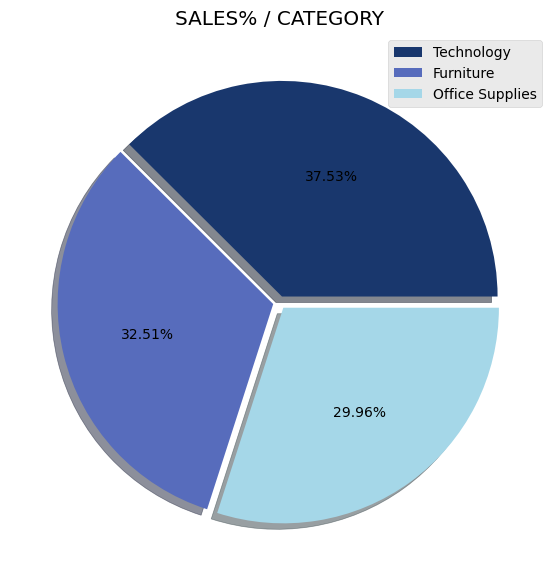

In [30]:
ax = category.plot(kind='pie', title='SALES% / CATEGORY',
                   figsize=[7,7],
                   x='category',
                   y='sales%',
                   autopct = "%.2f%%",
                   colors=['#19376D','#576CBC','#A5D7E8'],
                   shadow=True,
                   explode=[0.03,0.03,0.03],
                   labels=None)
plt.legend(category['category'])
plt.axis('off')
plt.show()

In this pie chart we can identify that all products categories are quite similar around 30%, although is obvious that the main products are in the technology category.

In [31]:
# Sales by regions and countries

region = df.groupby('region').agg({'total_sale':'sum'}).sort_values(by='total_sale', ascending=False).reset_index()
region['sales%'] = (region['total_sale'] / region['total_sale'].sum() * 100).round(2)
print(region)

               region  total_sale  sales%
0      Western Europe  1731931.05   13.70
1     Central America  1223100.79    9.67
2             Oceania  1100185.69    8.70
3   Southeastern Asia   884423.95    7.00
4       Southern Asia   866573.05    6.85
5        Eastern Asia   855059.62    6.76
6          Western US   725457.93    5.74
7          Eastern US   678781.36    5.37
8     Northern Europe   636779.95    5.04
9       South America   617223.64    4.88
10    Southern Europe   608594.14    4.81
11         Central US   501239.88    3.96
12        Southern US   391721.90    3.10
13          Caribbean   324280.89    2.57
14       Western Asia   317106.95    2.51
15     Eastern Europe   310033.44    2.45
16       North Africa   233216.61    1.84
17     Western Africa   173878.93    1.38
18     Central Africa   143630.01    1.14
19     Eastern Africa   127856.06    1.01
20    Southern Africa   105191.76    0.83
21             Canada    66928.17    0.53
22       Central Asia    19311.48 

In [32]:
country = df.groupby('country').agg({'total_sale':'sum'}).sort_values(by='total_sale', ascending=False).reset_index()
country['sales%'] = (country['total_sale'] / country['total_sale'].sum() * 100).round(2)
country.head(10)

,country,total_sale,sales%
0,United States,2297201.07,18.17
1,Australia,925236.91,7.32
2,France,858931.65,6.79
3,China,700562.09,5.54
4,Germany,628136.55,4.97
5,Mexico,621552.81,4.92
6,India,589486.12,4.66
7,United Kingdom,528576.55,4.18
8,Indonesia,404887.67,3.20
9,Brazil,359924.85,2.85


In [33]:
# Identifying trends

df.insert(loc=3, column='month', value=(df['order_date'].dt.month))
df.head()

,order_date,order_id,year,month,order_priority,shipping_date,order_processing_time,shipping_mode,shipping_cost,product_id,product_name,category,sub_category,price_unit,quantity,total_sale,discount,customer_id,customer_name,segment,city,state,country,region,market
0,2014-11-11,CA-2014-AB10015140-41954,2014,11,High,2014-11-13,2,First Class,40.77,TEC-PH-5816,Samsung Convoy 3,Technology,Phones,110.99,2,221.98,0.0,AB-100151402,Aaron Bergman,Consumer,Oklahoma City,Oklahoma,United States,Central US,USCA
1,2014-02-05,IN-2014-JR162107-41675,2014,2,Critical,2014-02-07,2,Second Class,923.63,FUR-CH-5379,"Novimex Executive Leather Armchair, Black",Furniture,Chairs,412.16,9,3709.40,0.1,JR-162107,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,Oceania,Asia Pacific
2,2014-10-17,IN-2014-CR127307-41929,2014,10,Medium,2014-10-18,1,First Class,915.49,TEC-PH-5356,"Nokia Smart Phone, with Caller ID",Technology,Phones,575.02,9,5175.17,0.1,CR-127307,Craig Reiter,Consumer,Brisbane,Queensland,Australia,Oceania,Asia Pacific
3,2014-01-28,ES-2014-KM1637548-41667,2014,1,Medium,2014-01-30,2,First Class,910.16,TEC-PH-5267,"Motorola Smart Phone, Cordless",Technology,Phones,578.50,5,2892.51,0.1,KM-1637548,Katherine Murray,Home Office,Berlin,Berlin,Germany,Western Europe,Europe
4,2014-11-05,SG-2014-RH9495111-41948,2014,11,Critical,2014-11-06,1,Same Day,903.04,TEC-CO-6011,"Sharp Wireless Fax, High-Speed",Technology,Copiers,354.12,8,2832.96,0.0,RH-9495111,Rick Hansen,Consumer,Dakar,Dakar,Senegal,Western Africa,Africa


In [34]:
month = df.groupby(['year','month']).agg({'total_sale':'sum'}).sort_values(by=['year','month'], ascending=True).reset_index()
month['sales%'] = (month['total_sale'] / month['total_sale'].sum() * 100).round(2)
month.head()

,year,month,total_sale,sales%
0,2012,1,98898.53,0.78
1,2012,2,103718.01,0.82
2,2012,3,135746.52,1.07
3,2012,4,114332.99,0.90
4,2012,5,158228.35,1.25


In [35]:
replace_month = {1 : 'Jan',
                 2 : 'Feb',
                 3 : 'Mar',
                 4 : 'Apr',
                 5 : 'May',
                 6 : 'Jun',
                 7 : 'Jul',
                 8 : 'Aug',
                 9 : 'Sep',
                 10 : 'Oct',
                 11 : 'Nov',
                 12 : 'Dec'}

month['month'] = month['month'].replace(replace_month)
month.head()

,year,month,total_sale,sales%
0,2012,Jan,98898.53,0.78
1,2012,Feb,103718.01,0.82
2,2012,Mar,135746.52,1.07
3,2012,Apr,114332.99,0.90
4,2012,May,158228.35,1.25


In [36]:
month['period'] = month['month'].astype(str).str.cat(month['year'].astype(str), sep='-')
month.head()

,year,month,total_sale,sales%,period
0,2012,Jan,98898.53,0.78,Jan-2012
1,2012,Feb,103718.01,0.82,Feb-2012
2,2012,Mar,135746.52,1.07,Mar-2012
3,2012,Apr,114332.99,0.90,Apr-2012
4,2012,May,158228.35,1.25,May-2012


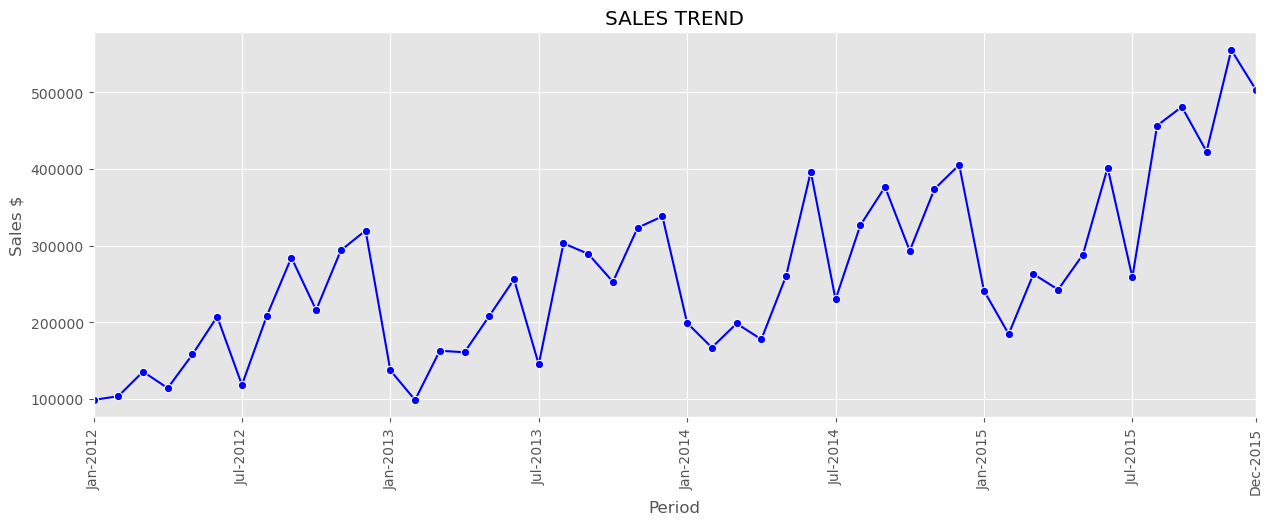

In [37]:
plt.figure(figsize=(15,5))
ax = sns.lineplot(data=month,
            x='period',
            y='total_sale',
            color='b',
            marker='o')
tick_positions = ['Jan-2012', 'Jul-2012', 'Jan-2013', 'Jul-2013', 'Jan-2014', 'Jul-2014', 'Jan-2015', 'Jul-2015', 'Dec-2015']
tick_labels = ['Jan-2012', 'Jul-2012', 'Jan-2013', 'Jul-2013', 'Jan-2014', 'Jul-2014', 'Jan-2015', 'Jul-2015', 'Dec-2015']
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels)
plt.title('SALES TREND')
plt.xlabel('Period')
plt.ylabel('Sales $')
plt.xlim(xmin=month['period'].iloc[0], xmax=month['period'].iloc[-1])
plt.xticks(rotation=90)
plt.show()

In this line chart, we can identify trends in shopping behavior of the custommers: 
- Sales start low from January, and February is the lowest month for sales every year.
- Starting in April, sales start to rise until June, and then slow down in July.
- From there, Sales start rising up again until December which is the best month.